In [3]:
import numpy as np

from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential


# https://towardsdatascience.com/machine-learning-on-macos-with-an-amd-gpu-and-plaidml-55a46fe94bc0

In [4]:
# Params
num_samples = 100000 
vect_len = 20
max_int = 10
min_int = 1

# Generate dataset
X = np.random.randint(min_int, max_int, (num_samples, vect_len))
Y = np.sum(X, axis=1)

# Get 80% of data for training
split_idx = int(0.8 * len(Y))
train_X = X[:split_idx, :]; test_X = X[split_idx:, :]
train_Y = Y[:split_idx]; test_Y = Y[split_idx:]


In [5]:
# Make model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(vect_len,)))
model.add(Dense(1))
model.compile('adam', 'mse', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), \
                    epochs=10, batch_size=128)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 3s 35us/sample - loss: 1227.8851 - accuracy: 0.0000e+00 - val_loss: 11.5722 - val_accuracy: 0.0000e+00
Epoch 2/10
80000/80000 [==============================] - 2s 25us/sample - loss: 7.4374 - accuracy: 0.0000e+00 - val_loss: 2.4486 - val_accuracy: 0.0000e+00
Epoch 3/10
80000/80000 [==============================] - 2s 25us/sample - loss: 0.5627 - accuracy: 0.0000e+00 - val_loss: 0.0583 - val_accuracy: 0.0000e+00
Epoch 4/10
80000/80000 [==============================] - 2s 26us/sample - loss: 0.0485 - accuracy: 0.0000e+00 - val_loss: 0.0396 - val_accuracy: 0.0000e+00
Epoch 5/10
80000/80000 [==============================] - 2s 26us/sample - loss: 0.0392 - accuracy: 0.0000e+00 - val_loss: 0.0338 - val_accuracy: 0.0000e+00
Epoch 6/10
80000/80000 [==============================] - 2s 29us/sample - loss: 0.0339 - accuracy: 0.0000e+00 - val_loss: 0.0292 - val_accuracy: 0.0000e+00
Epoc

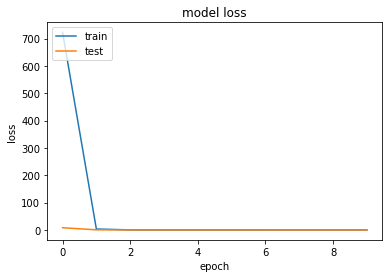

In [6]:
# summarize history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
